In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.spatial import distance_matrix
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
plt.rcParams['figure.figsize'] = [8, 5]

In [5]:
def compute_OI(alpha, x2):
    x1 = -2. # posición instrumento A
    x0 = 0. # posición donde queremos estimar
#     x2 = np.linspace(-4.,4.,100) # posiciónes posibles para el instrumento B

    d10 = abs(x1-x0) 
    d12 = abs(x1-x2)
    d20 = abs(x2-x0)
    rho10 = (1.+d10) * np.exp(-d10)

    """
       Calculate weights for obs 1 and obs 2
    """
    rho20 = (1+d20) * np.exp(-d20)
    rho12 = (1+d12) * np.exp(-d12)
    w1a = rho10*(1+alpha) - rho12*rho20
    w2a = rho20*(1+alpha) - rho12*rho10
    denom = (1+alpha)**2 - rho12*rho12

    w1 = w1a/denom # peso de la "información" del instrumento A
    w2 = w2a/denom # peso de la "información" del instrumento B
    """
       Calculate the analysis error variance
         normalized by the background error variance
    """
    var_a = 1. - ((1+alpha)*(rho10**2+rho20**2)-2*rho10*rho20*rho12)/denom
    
    return w1, w2, var_a

<IPython.core.display.Javascript object>


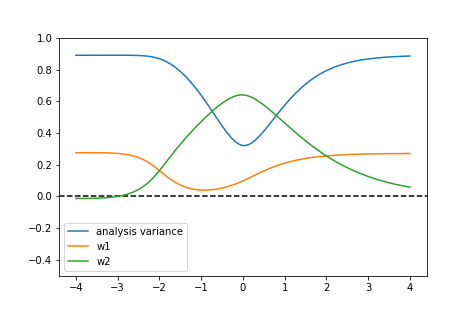

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTAuNSwgZGVzY3JpcHRpb249dSdhbHBoYScsIG1heD0zLjAsIG1pbj0wLjAxLCBzdGVwPTAuMDEpLCBPdXRwdXQoKSksIF/igKY=


In [57]:
x2 = np.linspace(-4.,4.,100)
compute_OI_for_alpha = lambda alpha: compute_OI(alpha, x2)

# Initialize plot
%matplotlib notebook
%matplotlib notebook
%matplotlib notebook


w1, w2, var_a = compute_OI_for_alpha(0.5)
fig, ax = plt.subplots()
ax.set_ylim(ymax=1., ymin=-0.5)
ax.axhline(y=0, color='black', linestyle='--')
l1, = ax.plot(x2, var_a, label='analysis variance')
l2, = ax.plot(x2, w1, label='w1')
l3, = ax.plot(x2, w2, label='w2')
ax.legend() 
plt.show()

@interact(alpha=widgets.FloatSlider(value=0.5, min=0.01, max=3, step=0.01))
def OI_plots(alpha):
    w1, w2, var_a = compute_OI_for_alpha(alpha)
    l1.set_ydata(var_a)
    l2.set_ydata(w1)
    l3.set_ydata(w2)
    plt.show()

<IPython.core.display.Javascript object>


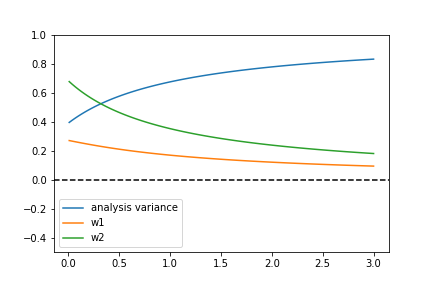

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTEuMCwgZGVzY3JpcHRpb249dSd4MicsIG1heD00LjAsIG1pbj0tNC4wKSwgT3V0cHV0KCkpLCBfZG9tX2NsYXNzZXM9KHXigKY=


In [40]:
alpha = np.linspace(0.01, 3, 100)
compute_OI_for_x2 = lambda x2: compute_OI(alpha, x2)

# Initialize plot
%matplotlib notebook
w1, w2, var_a = compute_OI_for_x2(1)
fig, ax = plt.subplots()
ax.set_ylim(ymax=1., ymin=-0.5)
ax.axhline(y=0, color='black', linestyle='--')
l1, = ax.plot(alpha, var_a, label='analysis variance')
l2, = ax.plot(alpha, w1, label='w1')
l3, = ax.plot(alpha, w2, label='w2')
ax.legend() 
plt.show()

@interact(x2=widgets.FloatSlider(value=1, min=-4, max=4, step=0.1))
def OI_plots_forx2(x2):
    w1, w2, var_a = compute_OI_for_x2(x2)
    l1.set_ydata(var_a)
    l2.set_ydata(w1)
    l3.set_ydata(w2)
    plt.show()

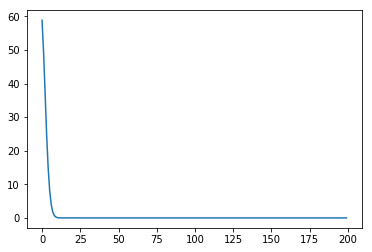

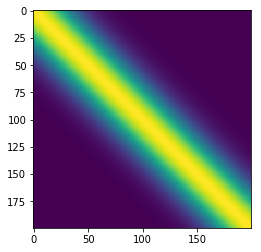

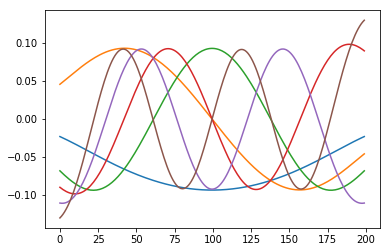

In [52]:
from scipy.spatial import distance_matrix
%matplotlib inline

nx = 200
grid = np.linspace(-4, 4, nx)
Ld = 1

def dist(x, y, Ld=1):
    return np.exp(-0.5 * (x-y)**2 /Ld**2)

Q = [[dist(grid[i], grid[j]) for i in range(len(grid))] for j in range(len(grid))]
Q = np.array(Q)

uQ, vQ = np.linalg.eig(Q)
plt.plot(uQ)
plt.show()
plt.imshow(Q)
plt.show()
for i in range(6):
    plt.plot(vQ[:, i])

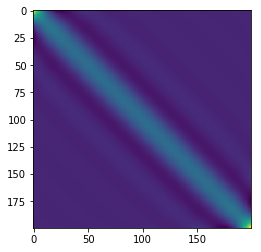

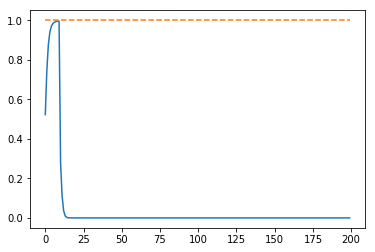

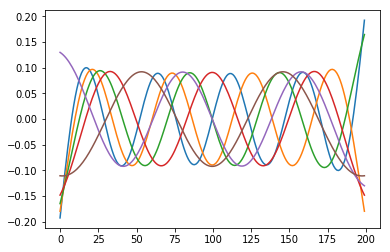

In [53]:
sigma_b = 2
sigma_r = 1
R = sigma_r * np.eye(nx)
Db = np.eye(nx)*sigma_b
B = np.dot(Db, Q).dot(Db)
A = B.dot(np.linalg.inv(B + R))
uA, vA = np.linalg.eig(A)

alpha = (sigma_r/sigma_b)**2

plt.imshow(A)
plt.show()
plt.plot(uA)
plt.plot(1/(1 + alpha/uQ), '--')
plt.show()
for i in range(6):
    plt.plot(vA[:, i])

In [51]:
uQ

array([ 5.88275873e+01+0.00000000e+00j,  4.94285252e+01+0.00000000e+00j,
        3.70412029e+01+0.00000000e+00j,  2.48189453e+01+0.00000000e+00j,
        1.49206131e+01+0.00000000e+00j,  8.08364343e+00+0.00000000e+00j,
        3.96705277e+00+0.00000000e+00j,  1.77325004e+00+0.00000000e+00j,
        7.26006338e-01+0.00000000e+00j,  2.73719402e-01+0.00000000e+00j,
        9.55024294e-02+0.00000000e+00j,  3.09751279e-02+0.00000000e+00j,
        9.37676507e-03+0.00000000e+00j,  2.65896561e-03+0.00000000e+00j,
        7.08633369e-04+0.00000000e+00j,  1.78024895e-04+0.00000000e+00j,
        4.22746138e-05+0.00000000e+00j,  9.51283177e-06+0.00000000e+00j,
        2.03317970e-06+0.00000000e+00j,  4.13622661e-07+0.00000000e+00j,
        8.02513842e-08+0.00000000e+00j,  1.48769699e-08+0.00000000e+00j,
        2.63953428e-09+0.00000000e+00j,  4.48928406e-10+0.00000000e+00j,
        7.32991172e-11+0.00000000e+00j,  1.15052721e-11+0.00000000e+00j,
        1.73855919e-12+0.00000000e+00j,  2.53375659